AWS

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [38]:
montage_20_t32xlarge_start = '20:06:05'
montage_20_t32xlarge_stop = '20:22:35'
montage_20_t3large_start = '18:46:52'
montage_20_t3large_stop = '19:02:29'

soykb_446_t32xlarge_start = '21:40:09'
soykb_446_t32xlarge_stop = '22:49:10'
soykb_446_t3large_start = '14:18:28'
soykb_446_t3large_stop = '17:15:02'

montage2_10_t32xlarge_start = '20:53:17'
montage2_10_t32xlarge_stop = '21:46:57'
montage2_10_t3large_start = '08:08:51'
montage2_10_t3large_stop = '09:35:05'

In [51]:
def calculate_duration(time_from, time_to):
    fmt = '%H:%M:%S'
    diff = datetime.strptime(time_from, fmt) - datetime.strptime(time_to, fmt)
    h,m,s = str(diff).split(':')
    return int(h)*60 + int(m) + int(s)/60

In [52]:
aws_data = {'t3.large': [calculate_duration(montage_20_t3large_stop, montage_20_t3large_start),
                        calculate_duration(montage2_10_t3large_stop, montage2_10_t3large_start),
                        calculate_duration(soykb_446_t3large_stop, soykb_446_t3large_start)],
           't3.2xlarge': [calculate_duration(montage_20_t32xlarge_stop, montage_20_t32xlarge_start),
                        calculate_duration(montage2_10_t32xlarge_stop, montage2_10_t32xlarge_start),
                        calculate_duration(soykb_446_t32xlarge_stop, soykb_446_t32xlarge_start)]}

In [53]:
def draw_comparison_bar_plot(data, labels):
    fig, ax = plt.subplots()
    x = np.arange(len(labels))
    for i, (instance, times) in enumerate(data.items()):
        width = 0.8/len(times)
        ax.bar(x - 0.4 + width/2 + width*i, times, width, label=instance)

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Time [minutes]')
    ax.set_title('Time of workflows execution by instance type')
    plt.xticks(rotation=90)
    
    ax.legend()

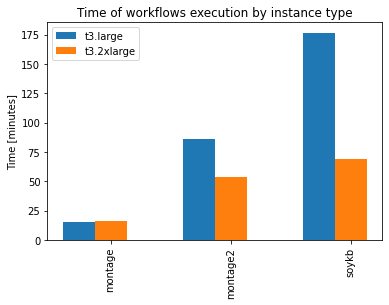

In [54]:
draw_comparison_bar_plot(aws_data, ['montage','montage2','soykb'])

GCLOUD